# Project 5: Feature Matching 

This iPython notebook:  
(1) Loads and resizes images  
(2) Finds interest points in those images                
(3) Describes each interest point with a local feature   
(4) Finds matching features                               
(5) Visualizes the matches  
(6) Evaluates the matches based on ground truth correspondences  
Other sources: https://medium.com/data-breach/introduction-to-feature-detection-and-matching-65e27179885d

## Setup

In [3]:
%matplotlib inline
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from student_feature_matching import match_features
from student_sift import get_features
from student_harris import get_interest_points
from IPython.core.debugger import set_trace

# Notre Dame
image1 = load_image('nd1.jpg')
image2 = load_image('nd2.jpg')
eval_file = '../data/Notre Dame/921919841_a30df938f2_o_to_4191453057_c86028ce1f_o.pkl'        

# # Mount Rushmore -- this pair is relatively easy (still harder than Notre Dame, though)
# image1 = load_image('../data/Mount Rushmore/9021235130_7c2acd9554_o.jpg')
# image2 = load_image('../data/Mount Rushmore/9318872612_a255c874fb_o.jpg')
# eval_file = '../data/Mount Rushmore/9021235130_7c2acd9554_o_to_9318872612_a255c874fb_o.pkl'

# # Episcopal Gaudi -- This pair is relatively difficult
# image1 = load_image('../data/Episcopal Gaudi/4386465943_8cf9776378_o.jpg')
# image2 = load_image('../data/Episcopal Gaudi/3743214471_1b5bbfda98_o.jpg')
# eval_file = '../data/Episcopal Gaudi/4386465943_8cf9776378_o_to_3743214471_1b5bbfda98_o.pkl'

scale_factor = 0.5
image1 = cv2.resize(image1, (0, 0), fx=scale_factor, fy=scale_factor)
image2 = cv2.resize(image2, (0, 0), fx=scale_factor, fy=scale_factor)
image1_bw = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
image2_bw = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

feature_width = 16 # width and height of each local feature, in pixels. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Find distinctive points in each image (Szeliski 4.1.1)

(1016, 762, 1)
(1024, 768, 1)


<IPython.core.display.Javascript object>


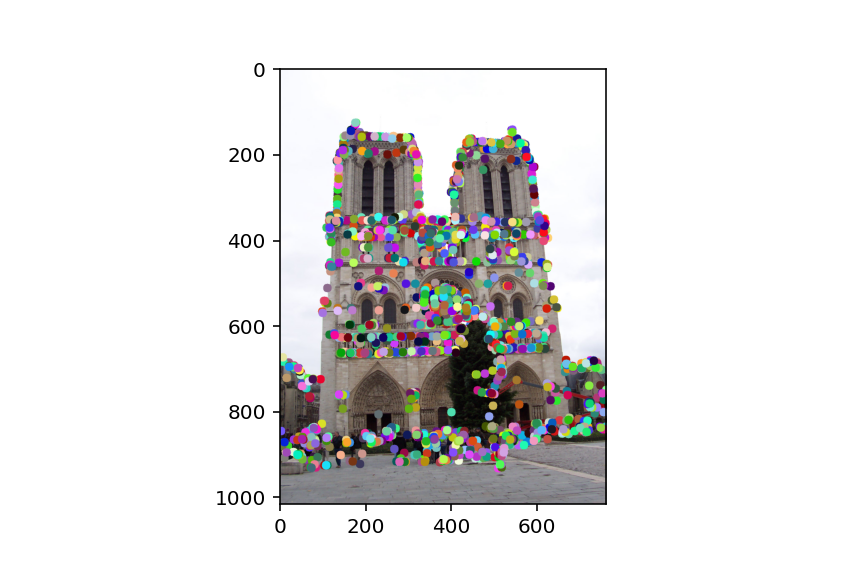

<IPython.core.display.Javascript object>


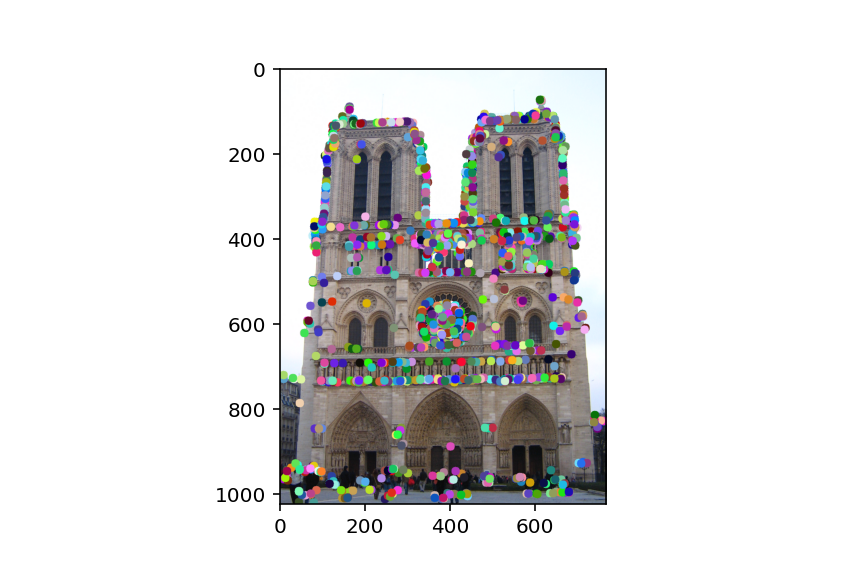

2000 corners in image 1, 2000 corners in image 2


In [4]:
x1, y1, _, scales1, _ = get_interest_points(image1_bw, feature_width)
x2, y2, _, scales2, _ = get_interest_points(image2_bw, feature_width)

# Visualize the interest points
c1 = show_interest_points(image1, x1, y1)
c2 = show_interest_points(image2, x2, y2)

plt.figure(); plt.imshow(c1)
plt.figure(); plt.imshow(c2)
print('{:d} corners in image 1, {:d} corners in image 2'.format(len(x1), len(x2)))

## Create feature vectors at each interest point (Szeliski 4.1.2)

In [6]:
image1_features = get_features(image1_bw, x1, y1, feature_width)
image2_features = get_features(image2_bw, x2, y2, feature_width)
#print(image1_features[0])

## Match features (Szeliski 4.1.3)

In [7]:
matches, confidences = match_features(image1_features, image2_features, x1, y1, x2, y2)
#print(matches)
print('{:d} matches from {:d} corners'.format(len(matches), len(x1)))

176 matches from 2000 corners


## Visualization

You might want to set 'num_pts_to_visualize' and 'num_pts_to_evaluate' to some constant (e.g. 100) once you start detecting hundreds of interest points, otherwise things might get too cluttered. You could also threshold based on confidence.  
  
There are two visualization functions below. You can comment out one of both of them if you prefer.

<IPython.core.display.Javascript object>


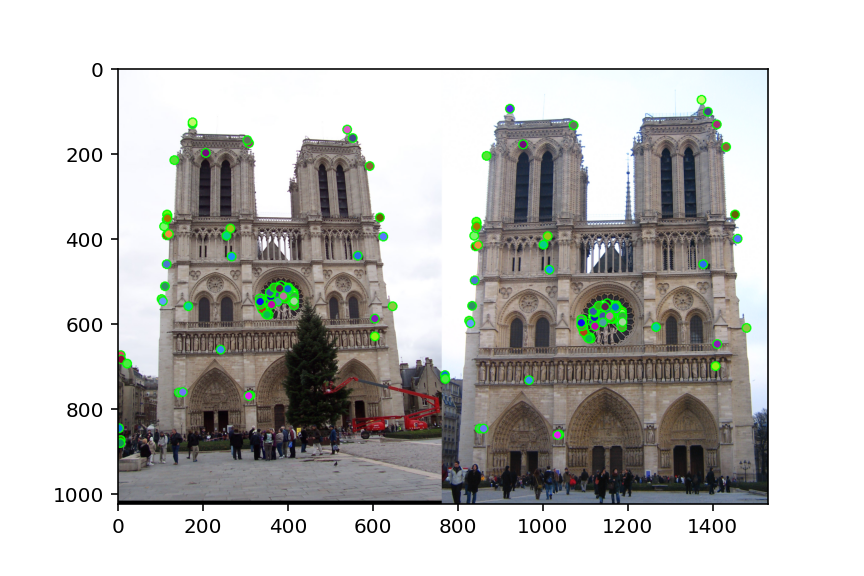

<IPython.core.display.Javascript object>


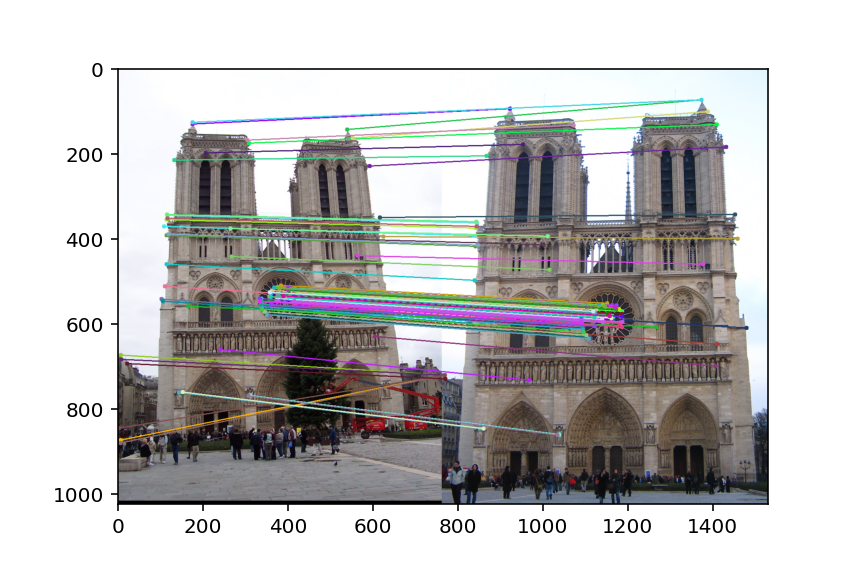

In [9]:
# num_pts_to_visualize = len(matches)
num_pts_to_visualize = 100
c1 = show_correspondence_circles(image1, image2,
                    x1[matches[:num_pts_to_visualize, 0]], y1[matches[:num_pts_to_visualize, 0]],
                    x2[matches[:num_pts_to_visualize, 1]], y2[matches[:num_pts_to_visualize, 1]])
plt.figure(); plt.imshow(c1)
# plt.savefig('../results/vis_circles.jpg', dpi=1000)
c2 = show_correspondence_lines(image1, image2,
                    x1[matches[:num_pts_to_visualize, 0]], y1[matches[:num_pts_to_visualize, 0]],
                    x2[matches[:num_pts_to_visualize, 1]], y2[matches[:num_pts_to_visualize, 1]])
plt.figure(); plt.imshow(c2)
# plt.savefig('../results/vis_lines.jpg', dpi=1000)

Comment out the function below if you are not testing on the Notre Dame, Episcopal Gaudi, and Mount Rushmore image pairs--this evaluation function will only work for those which have ground truth available.  
  
You can use `annotate_correspondences/collect_ground_truth_corr.py` to build the ground truth for other image pairs if you want, but it's very tedious. It would be a great service to the class for future years, though!

Correct
Correct
Incorrect
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Incorrect
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Incorrect
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Incorrect
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
You found 100/100 required matches
Accuracy = 0.880000


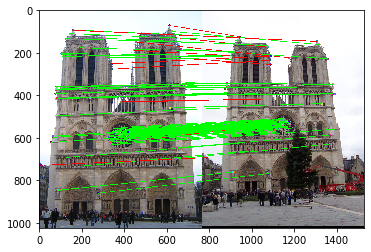

In [6]:
# num_pts_to_evaluate = len(matches)
num_pts_to_evaluate = 100
_, c = evaluate_correspondence(image1, image2, eval_file, scale_factor,
                        x1[matches[:num_pts_to_evaluate, 0]], y1[matches[:num_pts_to_evaluate, 0]],
                        x2[matches[:num_pts_to_evaluate, 1]], y2[matches[:num_pts_to_evaluate, 1]])
plt.figure(); plt.imshow(c)
plt.savefig('../results/eval.jpg', dpi=1000)

# Run test on the other images
We want to test our algorithm against the other images provided. To do this the code is repeated below.

(972, 1296, 1)
(1056, 1408, 1)
2000 corners in image 1, 2000 corners in image 2
169 matches from 2000 corners
Incorrect
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Incorrect
Incorrect
Correct
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
You found 100/100 required matches
Accuracy = 0.910000


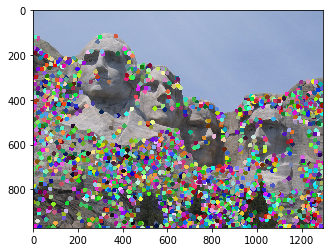

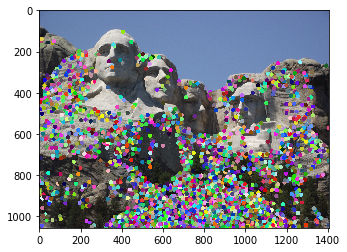

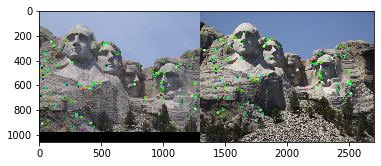

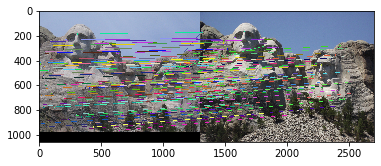

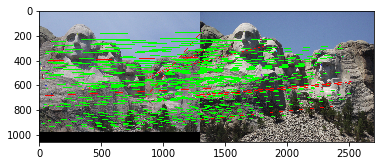

In [7]:
# # Mount Rushmore -- this pair is relatively easy (still harder than Notre Dame, though)
image1 = load_image('../data/Mount Rushmore/9021235130_7c2acd9554_o.jpg')
image2 = load_image('../data/Mount Rushmore/9318872612_a255c874fb_o.jpg')
eval_file = '../data/Mount Rushmore/9021235130_7c2acd9554_o_to_9318872612_a255c874fb_o.pkl'

scale_factor = 0.5
image1 = cv2.resize(image1, (0, 0), fx=scale_factor, fy=scale_factor)
image2 = cv2.resize(image2, (0, 0), fx=scale_factor, fy=scale_factor)
image1_bw = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
image2_bw = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

feature_width = 16 # width and height of each local feature, in pixels. 

# We want to collect all the interest points for the images. These are points identified by a harris
# corner detector to be unique points

x1, y1, _, scales1, _ = get_interest_points(image1_bw, feature_width)
x2, y2, _, scales2, _ = get_interest_points(image2_bw, feature_width)

# Visualize the interest points
c1 = show_interest_points(image1, x1, y1)
c2 = show_interest_points(image2, x2, y2)

plt.figure(); plt.imshow(c1)
plt.figure(); plt.imshow(c2)
print('{:d} corners in image 1, {:d} corners in image 2'.format(len(x1), len(x2)))

# Once we have these iterest points we need to convert them into features. These features provide
# more information than the where the point is located.

image1_features = get_features(image1_bw, x1, y1, feature_width)
image2_features = get_features(image2_bw, x2, y2, feature_width)

# We want to them match the features in the 2 images. Similar features will also have similar features
# We do this by used the nearest neighbor formatula which is the uclidean distance between the two features
matches, confidences = match_features(image1_features, image2_features, x1, y1, x2, y2)
#print(matches)
print('{:d} matches from {:d} corners'.format(len(matches), len(x1)))


# Visualize the matched images
num_pts_to_visualize = 100
c1 = show_correspondence_circles(image1, image2,
                    x1[matches[:num_pts_to_visualize, 0]], y1[matches[:num_pts_to_visualize, 0]],
                    x2[matches[:num_pts_to_visualize, 1]], y2[matches[:num_pts_to_visualize, 1]])
plt.figure(); plt.imshow(c1)
plt.savefig('../results/vis_circles.jpg', dpi=1000)
c2 = show_correspondence_lines(image1, image2,
                    x1[matches[:num_pts_to_visualize, 0]], y1[matches[:num_pts_to_visualize, 0]],
                    x2[matches[:num_pts_to_visualize, 1]], y2[matches[:num_pts_to_visualize, 1]])
plt.figure(); plt.imshow(c2)
plt.savefig('../results/vis_lines.jpg', dpi=1000)

# Check the accuracy of the matches
num_pts_to_evaluate = 100
_, c = evaluate_correspondence(image1, image2, eval_file, scale_factor,
                        x1[matches[:num_pts_to_evaluate, 0]], y1[matches[:num_pts_to_evaluate, 0]],
                        x2[matches[:num_pts_to_evaluate, 1]], y2[matches[:num_pts_to_evaluate, 1]])
plt.figure(); plt.imshow(c)
plt.savefig('../results/eval.jpg', dpi=1000)

In [ ]:
# # Episcopal Gaudi -- This pair is relatively difficult
image1 = load_image('../data/Episcopal Gaudi/4386465943_8cf9776378_o.jpg')
image2 = load_image('../data/Episcopal Gaudi/3743214471_1b5bbfda98_o.jpg')
eval_file = '../data/Episcopal Gaudi/4386465943_8cf9776378_o_to_3743214471_1b5bbfda98_o.pkl'

scale_factor = 0.5
image1 = cv2.resize(image1, (0, 0), fx=scale_factor, fy=scale_factor)
image2 = cv2.resize(image2, (0, 0), fx=scale_factor, fy=scale_factor)
image1_bw = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
image2_bw = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

feature_width = 16 # width and height of each local feature, in pixels. 

# We want to collect all the interest points for the images. These are points identified by a harris
# corner detector to be unique points

x1, y1, _, scales1, _ = get_interest_points(image1_bw, feature_width)
x2, y2, _, scales2, _ = get_interest_points(image2_bw, feature_width)

# Visualize the interest points
c1 = show_interest_points(image1, x1, y1)
c2 = show_interest_points(image2, x2, y2)

plt.figure(); plt.imshow(c1)
plt.figure(); plt.imshow(c2)
print('{:d} corners in image 1, {:d} corners in image 2'.format(len(x1), len(x2)))

# Once we have these iterest points we need to convert them into features. These features provide
# more information than the where the point is located.

image1_features = get_features(image1_bw, x1, y1, feature_width)
image2_features = get_features(image2_bw, x2, y2, feature_width)

# We want to them match the features in the 2 images. Similar features will also have similar features
# We do this by used the nearest neighbor formatula which is the uclidean distance between the two features
matches, confidences = match_features(image1_features, image2_features, x1, y1, x2, y2)
#print(matches)
print('{:d} matches from {:d} corners'.format(len(matches), len(x1)))


# Visualize the matched images
num_pts_to_visualize = 100
c1 = show_correspondence_circles(image1, image2,
                    x1[matches[:num_pts_to_visualize, 0]], y1[matches[:num_pts_to_visualize, 0]],
                    x2[matches[:num_pts_to_visualize, 1]], y2[matches[:num_pts_to_visualize, 1]])
plt.figure(); plt.imshow(c1)
plt.savefig('../results/vis_circles.jpg', dpi=1000)
c2 = show_correspondence_lines(image1, image2,
                    x1[matches[:num_pts_to_visualize, 0]], y1[matches[:num_pts_to_visualize, 0]],
                    x2[matches[:num_pts_to_visualize, 1]], y2[matches[:num_pts_to_visualize, 1]])
plt.figure(); plt.imshow(c2)
plt.savefig('../results/vis_lines.jpg', dpi=1000)

# Check the accuracy of the matches
num_pts_to_evaluate = 100
_, c = evaluate_correspondence(image1, image2, eval_file, scale_factor,
                        x1[matches[:num_pts_to_evaluate, 0]], y1[matches[:num_pts_to_evaluate, 0]],
                        x2[matches[:num_pts_to_evaluate, 1]], y2[matches[:num_pts_to_evaluate, 1]])
plt.figure(); plt.imshow(c)
plt.savefig('../results/eval.jpg', dpi=1000)

(600, 800, 1)
(900, 1350, 1)
2000 corners in image 1, 2000 corners in image 2


In [ ]:
# # Episcopal Gaudi -- This pair is relatively difficult
image1 = load_image('../data/Snickers/snickers.jpeg')
image2 = load_image('../data/Snickers/snickers2.jpg')

scale_factor = 0.5
image1 = cv2.resize(image1, (0, 0), fx=scale_factor, fy=scale_factor)
image2 = cv2.resize(image2, (0, 0), fx=scale_factor, fy=scale_factor)

feature_width = 16 # width and height of each local feature, in pixels. 

# We want to collect all the interest points for the images. These are points identified by a harris
# corner detector to be unique points

x1, y1, _, scales1, _ = get_interest_points(image1_bw, feature_width)
x2, y2, _, scales2, _ = get_interest_points(image2_bw, feature_width)

# Visualize the interest points
c1 = show_interest_points(image1, x1, y1)
c2 = show_interest_points(image2, x2, y2)

plt.figure(); plt.imshow(c1)
plt.figure(); plt.imshow(c2)
print('{:d} corners in image 1, {:d} corners in image 2'.format(len(x1), len(x2)))

# Once we have these iterest points we need to convert them into features. These features provide
# more information than the where the point is located.

image1_features = get_features(image1_bw, x1, y1, feature_width)
image2_features = get_features(image2_bw, x2, y2, feature_width)

# We want to them match the features in the 2 images. Similar features will also have similar features
# We do this by used the nearest neighbor formatula which is the uclidean distance between the two features
matches, confidences = match_features(image1_features, image2_features, x1, y1, x2, y2)
#print(matches)
print('{:d} matches from {:d} corners'.format(len(matches), len(x1)))


# Visualize the matched images
num_pts_to_visualize = 100
c1 = show_correspondence_circles(image1, image2,
                    x1[matches[:num_pts_to_visualize, 0]], y1[matches[:num_pts_to_visualize, 0]],
                    x2[matches[:num_pts_to_visualize, 1]], y2[matches[:num_pts_to_visualize, 1]])
plt.figure(); plt.imshow(c1)
plt.savefig('../results/vis_circles.jpg', dpi=1000)
c2 = show_correspondence_lines(image1, image2,
                    x1[matches[:num_pts_to_visualize, 0]], y1[matches[:num_pts_to_visualize, 0]],
                    x2[matches[:num_pts_to_visualize, 1]], y2[matches[:num_pts_to_visualize, 1]])
plt.figure(); plt.imshow(c2)
plt.savefig('../results/vis_lines.jpg', dpi=1000)

# Writeup

There were three aspects to this project. 
- Harris corner detection 
- Sift feature creation
- Feature matching

Each of these elements needs to have create good output and be fast. Many of these algorithms run very slowly so if they take too long it becomes infeasible to run it on many different points. 

### Harris Corner Detection
The purpose of this algorithm is to find corners in an image. It is the first step in our ultimate goal of matching objects in two images. There two major step in the Harris corner detection algorithm.

- Corner detection
- Non-maximal suppression

Corner detection:
In order to detect possible corners in the images we need to first get the pixel gradient of the image. We start by running a sobel xy filter on the image. We can then do so eigen value magic on the resulting image get the likelyhood that the pixel is a corner.

for each pixel in the image we take the sobel gradient I<sub>x</sub>, I<sub>y</sub>.
$$I_{xx} = I_x*I_x$$
$$I_{xy} = I_x*I_y$$
$$I_{yy} = I_y*I_y$$
We then calculate the R value with the equation 
$$R = (I_{xx}*I_{yy}-I_{xy}^2) - k*(I_{xx}+I_{yy})^2$$
We then want to filter out all the values that are not at least 1% of the max

The next step is to supress all the values that are not strong enough for us to look at. This is very important for both accuracy and speed. The larger number of point we keep the larger our accuracy value is going to be, but also the larger our computation time will be. For this we chose to  keep 2000 points.

For this we need to look at every R value that we have calcualted and compare it to the other R values if two very large R values are right next to each these are likely the same corner.
To make this section faster we found that using pythons enumerate function lead to much faster execution of required loops. 


### Sift Feature Creation

Once the interest points are determined by the Harris agorithm above they are passed to the SIFT feature detector algorithm. The job of this algorithm is to create features for each of the key points by creating a histogram of oriented gradients. We create 16x16 patches and for each patch we calculate the angle and magnitude for every element in the patch. We then collect those vectors into a histogram of gradients. We then return a list of the histograms as the feature

Right before we return the histogram we the 0.86 power of the the values. Through expirementation and a little guidance from classmates we have found this to increase our detection rate significantly.

### Feature Matching
Once we have the feature descriptors for the two images we need to match them to each other. 

There are two major steps in this mathcing. We need to compare the distances and then we need to threshold the distances that do not meet the criteria. To compare the features we need to compare each feature in the first image to every feature in the second image. This can take a very long time. We were able to speed it up significanty by replacing 'range(len())' with enumerate. We also found that putting as much work into the same look as possible was important becuase seperating the loops is a waste of time. 

To get a good score for feature matching we used the nearest neighbor distance ratio formatula specified in the book. We took the difference between each of the descriptors. When took the two nearest descriptors and found the ratio. If the ratio was above 0.8 we threw the value away.



## Results

We ended with a accuracy rating of 
- 86% for NotreDam
- 89% for Mount Rushmore
- 3% for Episcopal Gaudi
- 0% for Snickers

The poor preformance on the Episcopal Gaudi image coud be due to the significant size difference of the image. The other two images have about the same size.

The Snickers test did not do well. This picture was a lot more complicated but it seemed to have a consistant patter is a pretty weird place so I don't really 